In [1]:
import numpy as np
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [3]:
model = Sequential([Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1:])),
                    MaxPooling1D(pool_size=2),
                    Conv1D(64, kernel_size=3, activation='relu'),
                    MaxPooling1D(pool_size=2),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(1)])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [4]:
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=0)

In [5]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 27.243070602416992
Mean Absolute Error: 4.0240159034729


In [6]:
predicted_prices = model.predict(x_test)
for i in range(5):
    print(f"Actual Price: {y_test[i]}, Predicted Price: {predicted_prices[i][0]}")

4/4 [==============================] - 0s 3ms/step
Actual Price: 7.2, Predicted Price: 13.70034122467041
Actual Price: 18.8, Predicted Price: 18.64386749267578
Actual Price: 19.0, Predicted Price: 22.073326110839844
Actual Price: 27.0, Predicted Price: 26.716045379638672
Actual Price: 22.2, Predicted Price: 21.401025772094727


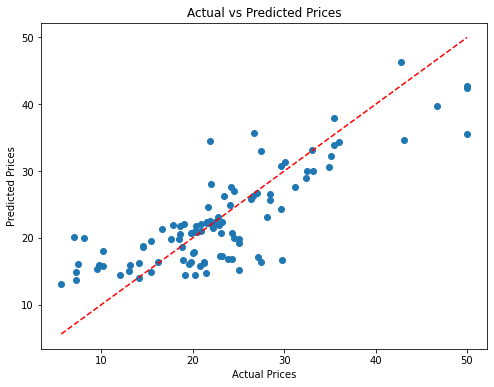

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_prices)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')